Quickstart Guide
================

This guides demonstrates the basic usage of DPsim as a Python module.

(Please note that DPsim also provides a C++ API.)

The first simulation
--------------------

As a first simple, test we will simulate the following static network:

![](Figures/Example1.svg)

The network consists of 4 nodes and 4 elements:

| Component | Type            | Python Class                              | Node A | Node B | Paramter |
| :---------| :----           | :---------------------------------------- | :----- | :----- | :------- |
| v_s       | Voltage Source  | `dpsim.components.dp.VoltageSourceNorton` | 0      | GND    | 10 kV    |
| r_line    | Line Resistance | `dpsim.components.dp.Resistor`            | 0      | 1      | 1 Ohm    |
| l_line    | Line Inductance | `dpsim.components.dp.Inductor`            | 1      | 2      | 1 Henry  |
| r_load    | Load            | `dpsim.components.dp.Resistor`            | 2      | GND    | 1 kOhm   |

Before we can start, we must import the DPsim Python module.
We also add `dp` as an alias for the dynamic phasor components.

In [21]:
import dpsim
import dpsim.components.dp as dp

Next, we can define the model by creating a couple of components.
Each component is identified by a name which is passed as the first argument.
Following arguments are used to define the topology by assigning the component to a specific node / bus or to pass parameters.

In [22]:
components = [
	dp.VoltageSourceNorton("v_s", 0, -1, 10000+0j, 1),
	dp.Resistor("r_line", 0, 1, 1),
	dp.Inductor("l_line", 1, 2, 1),
	dp.Resistor("r_load", 2, -1, 1000)
]

Next, we have to create a simulation object:

In [26]:
sim = dpsim.Simulation(
	"Example1", # Name will be used for log files
	components,
	timestep = 1e-4,
	duration = 0.03
)

Finally, we can start the simulation and wait for its completion:

In [27]:
sim.run()

Results can be analyzed and plotted by the `dataprocessing` package:

DPsim results column names: ['NodeRe0000', 'NodeRe0001', 'NodeRe0002', 'NodeIm0000', 'NodeIm0001', 'NodeIm0002']
DPsim results number: 3


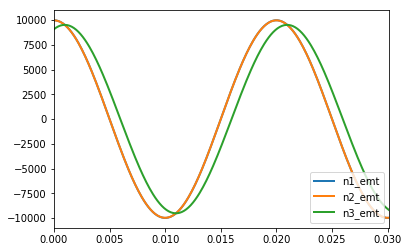

In [28]:
import matplotlib as plt
import dataprocessing.plottools as pt
import dataprocessing.readtools as rt
import dataprocessing.timeseries as ts

results     = rt.read_timeseries_dpsim_cmpl('Logs/Example1_LeftVector.csv')
results_emt = [ series.dynphasor_shift_to_emt('%s_emt' % series.name, 50) for series in results ]

for series in results_emt:
    pt.plot_timeseries('Results EMT', series)